In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
data, label_true = load_data('gaussian2d') # iris  'iris')#
pca_painter = PaintPCA(data)
feat_num = data.shape[1]

No PCA performed


Category 6 is too small
Category 8 is too small
Category 9 is too small
Category 10 is too small
Category 11 is too small
Category 6 is too small
Category 8 is too small
Category 9 is too small
Category 10 is too small
Category 11 is too small
Category 6 is too small
Category 8 is too small
Category 9 is too small
Category 10 is too small
Category 11 is too small
figure saved at _simcache/2022-05-05_13-06-42_cat-2choices_var_rho60[1651752402686346]


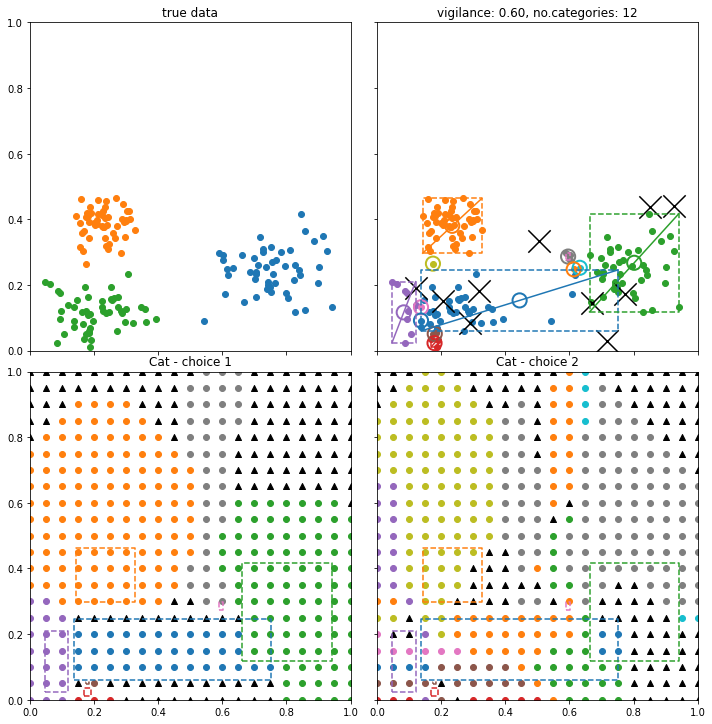

In [3]:
no_rho = 11
ls_rho = np.linspace(0, 1, no_rho)
fig, axs = plt.subplots(2, 2,
                        figsize = (10, 10), sharex=True, sharey=True)
fig.tight_layout()

# plot true data
pca_painter.scatter(axs[0,0], label_true)
axs[0,0].set_title("true data")
axs[0,0].set_xlim(0, 1)
axs[0,0].set_ylim(0, 1)


# init
rho=0.6
net = FuzzyART(feat_num, alpha=0.9, rho=rho, best_match_num=2)

# train
net.train(data, epochs=100) # each epoch, all data is shuffled
label_pred = net.test(data)[:, 0].astype(int)

# plot
# pred
pca_painter.scatter(axs[0,1], label_pred, data)

# bipole and centre
pca_painter.tripole(axs[0,1], *net.getcat_bipole())

# boundary    
axs[0,1].set_prop_cycle(None)
[pca_painter.boundary(a, net.getcat_vertex()) for a in (axs[0,1], axs[1,0], axs[1,1])]

# 2d meshgrid
grid_x = np.linspace(0, 1, 21)
grid_y = np.linspace(0, 1, 21)
grid_xy = np.reshape(np.meshgrid(grid_x, grid_y), (2, -1)).T
for idx in range(2):
    label_grid = net.test(grid_xy).astype(int)[:, idx]
    pca_painter.scatter(axs[1,idx], label_grid, grid_xy)    
    axs[1,idx].set_title('Cat - choice {}'.format(idx+1))

# info
cat_number = net.w.shape[0]
axs[0,1].set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))

cat_replay = net.replay((0,1), 10,0, None).T
axs[0,1].scatter(*cat_replay, marker='x', s=500, c='k')

# save fig
simname = 'cat-2choices_var_rho{:d}'.format(int(rho*100))
dirname = '_simcache'
savefigure_datetime(fig, simname, dirname)
    